# Тестирование инварианта для преобразования Фурье, частоты в радианах.

$\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{-ix\xi}f(x)dx$,

инвариант: $f(x) = e^{-\frac{x^2}{2}}$, константа: $\sqrt{2\pi}$

Обоснование:

Преобразование Фурье вида $\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{-ix\xi}f(x)dx$, действуя на $f(x) = e^{-\frac{x^2}{2}}$, принимает вид

$\hat{f(\xi)} = 
\int_{-\infty}^{\infty}e^{-ix\xi} e^{-\frac{x^2}{2}}dx = 
\int_{-\infty}^{\infty}e^{-ix\xi -\frac{x^2}{2}}dx = 
\int_{-\infty}^{\infty}e^{-(\frac{x}{\sqrt{2}})^2 - ix\xi - (\frac{i\xi}{\sqrt{2}})^2 + (\frac{i\xi}{\sqrt{2}})^2}dx = 
\int_{-\infty}^{\infty}e^{-(\frac{x}{\sqrt{2}} + \frac{i\xi}{\sqrt{2}})^2 - (\frac{\xi}{\sqrt{2}})^2}dx = 
e^{-(\frac{\xi}{\sqrt{2}})^2}\int_{-\infty}^{\infty}e^{-(\frac{x}{\sqrt{2}} + \frac{i\xi}{\sqrt{2}})^2}dx =
\color{blue}{// t = \frac{x}{\sqrt{2}} + \frac{i\xi}{\sqrt{2}}, dt = \frac{1}{\sqrt{2}}dx//}=
e^{-\frac{\xi^2}{2}} \cdot \sqrt{2\pi}$

Библиотечное преобразование имеет неизменный вид $\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{-2\pi ix\xi}f(x)dx$

То, которое нас интересует - $\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{-ix\xi}f(x)dx$.

Для того, чтобы их связать, можно использовать теоремы о растяжении, согласно которым:

1. $f(ax) <=> \frac{1}{|a|} \hat{f}(\frac{\xi}{a})$
2. $\frac{1}{|a|} f(\frac{x}{a}) <=> \hat{f}(a\xi)$

Главный вопрос, который ставит перед нами такое положение вещей, может быть сформулирован следующим образом:

Пусть известна функция $f_1(x)$ и её образ $\hat{f_1(\xi)} = \int_{-\infty}^{\infty}e^{-ix\xi}f_1(x)dx$,

Нужно отыскать такую функцю $f_2(t)$, чтобы её образ $\hat{f_2(\xi)} = \int_{-\infty}^{\infty}e^{-2\pi ix\xi}f_2(t)dt$ был равен $\hat{f_1(\xi)}$ (можно с константами или дополнительными множителями).

Хорошим было бы положение вещей, при которых из $f_1(x)$ было бы легко получить $f_2(x)$.

Воспользовавшись теоремой о растяжении, положим $f_2(x) = f_1(2\pi x)$. Тогда $f_2(x) = f_1(2\pi x) <=> \frac{1}{2\pi} \hat{f_2}(\frac{\xi}{2\pi})$

Попробуем проделать это (похоже, работает).

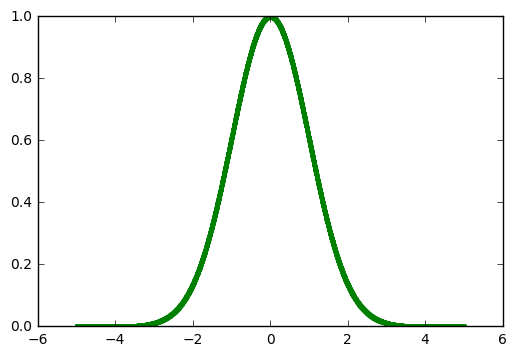

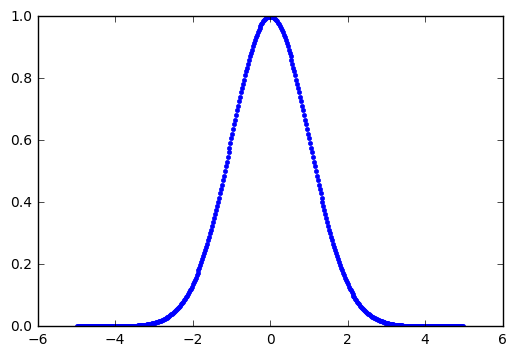

In [7]:
import numpy as np
from numpy import fft, pi, sqrt
from scipy import integrate
from matplotlib import pyplot as plt

M = 2**14
x_space = np.linspace(-20, 20, num = M, endpoint = False)
dx = abs(x_space[1] - x_space[0])
#инвариант для преобразований без двух пи
f1 = np.exp(-(x_space * x_space)/2)

plt.plot(x_space[(x_space>-5) & (x_space<5)], f1[(x_space>-5) & (x_space<5)], 'g.')
plt.show()

f2 = np.exp(-((2*pi*x_space) * (2*pi*x_space))/2)

f_hat = 2*pi*fft.fft(f2)
xi_space = fft.fftfreq(M, d = dx)

offset_factor = np.exp(2*pi*1j* (M//2) * dx * xi_space )
         
f_hat = 1/np.sqrt(2*np.pi) * dx * offset_factor * f_hat

# Рисуем только те же значения xi, для которых мы определяли функцию по x, 
# чтобы сравнение картинок получилось наглядным
# Мы не использовали сдвиг ответа, но это то, что нужно сделать, если потом нужно применять не ifft

plt.plot(xi_space[(xi_space>-5) & (xi_space<5)], f_hat.real[(xi_space>-5) & (xi_space<5)], 'b.')
plt.show()

# мнимая часть мала, но есть. Можно раскомментировать, чтобы на неё посмотреть.
# plt.plot(xi_space[(xi_space>-10) & (xi_space<10)], f_hat.imag[(xi_space>-10) & (xi_space<10)], 'r.')
# plt.show()